<a href="https://colab.research.google.com/github/sumanapalle065/LC25000-Hybrid-Architecture-using-DL/blob/main/LC25000_Hybrid_Arc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
import glob # library to retrieve file paths matching a pattern
import matplotlib.pyplot as matplib # library for plotting graphs
import random # Random library for random number generation
from PIL import Image, ImageEnhance
from tqdm import tqdm # import TQDM library for displaying progress bars within loops
from skimage.color import rgb2lab, lab2rgb
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Sklearn metrics for classification performance
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import label_binarize # Funciton for converting labels to binary format for multiclass problems
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

In [ ]:
 !unzip "/content/drive/MyDrive/LC25000.zip"

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [ ]:
# In the lung_colon_image_set directory and its subdirectories, use glob to retrieve all image file paths.
lung_colon_image_set_df=glob.glob("/content/lung_colon_image_set/*/*/*")

In [ ]:
lung_colon_image_set_df

['/content/lung_colon_image_set/lung_image_sets/lung_n/lungn3211.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn3535.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn4218.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn400.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn4258.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn3257.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn1579.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn4703.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn1229.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn3232.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn424.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn483.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn2797.jpeg',
 '/content/lung_colon_image_set/lung_image_sets/lung_n/lungn4097.jp

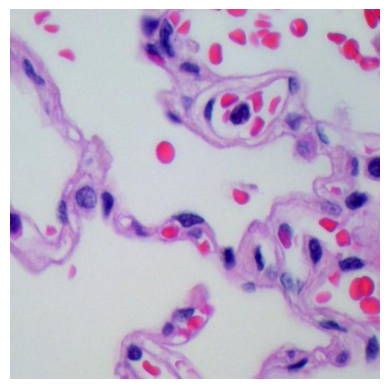

In [ ]:
# Choose a randomly selected image path from
image_path = random.choice(lung_colon_image_set_df)  # Choosen a randomly selected image path from the dataset
image = cv2.imread(image_path)
# Change the color space of the image from BGR color space to RGB color space since we know OpenCV reads in images by default in BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
matplib.imshow(image)  # Displays the image on the plot
matplib.axis('off')  # Hides the axes for a cleaner view of the image
matplib.show()  # Shows the plot with the image

100%|██████████| 25000/25000 [01:45<00:00, 237.60it/s]


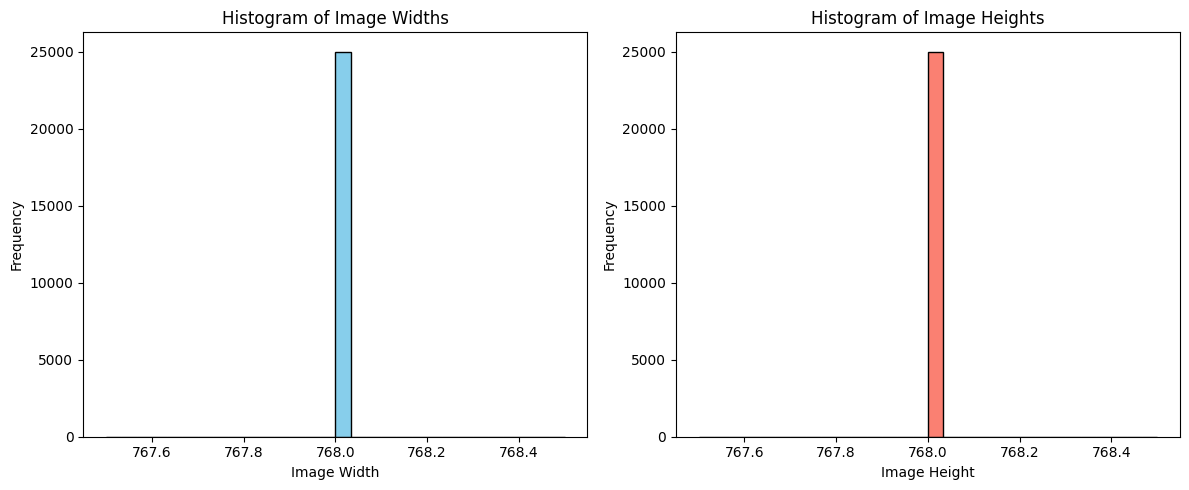

<ipython-input-11-076f67684bc8>:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Width', y='Height', data=df, hue=None, palette='viridis')


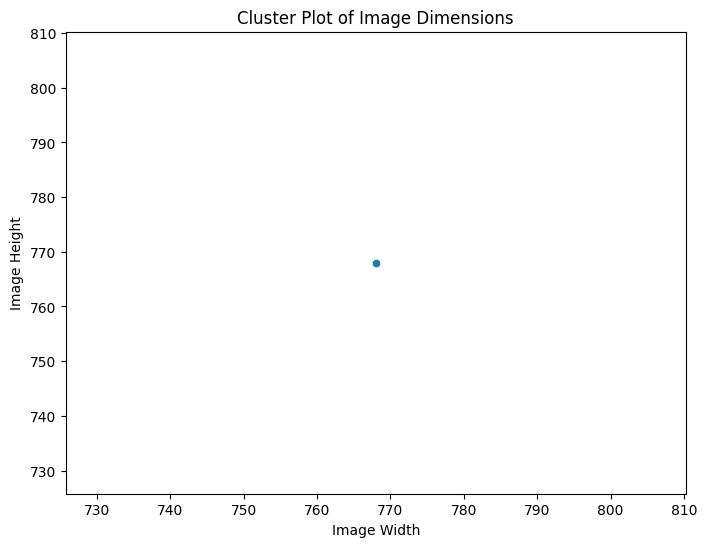

In [ ]:
import matplotlib.pyplot as plt

# Initializing lists to store image widths and heights
widths = []
heights = []

# Loop through each image path in the dataset
for img_path in tqdm(lung_colon_image_set_df):
    img = cv2.imread(image_path)
    if img is not None:
        h, w = img.shape[:2]  # Get image height and width
        heights.append(h)
        widths.append(w)

# Plot the histograms for widths and heights
plt.figure(figsize=(12, 5))

# Width Histogram
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Image Width")
plt.ylabel("Frequency")
plt.title("Histogram of Image Widths")

# Height Histogram
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.xlabel("Image Height")
plt.ylabel("Frequency")
plt.title("Histogram of Image Heights")

plt.tight_layout()
plt.show()

# Cluster Plot for Widths and Heights
import pandas as pd

# Convert the data to a DataFrame for easy plotting
df = pd.DataFrame({'Width': widths, 'Height': heights})

# Plot a cluster plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Width', y='Height', data=df, hue=None, palette='viridis')
plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Cluster Plot of Image Dimensions")
plt.show()
